<a href="https://colab.research.google.com/github/khlodMohamed/Computer-Vision/blob/main/Stereo/Stereo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STEREO Block matching and DP**


#Khlod Mohamed      5695
# Hager Abouroumia   5943

#Yehia ElDallal     5607

---




# Import Libraries:








In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#Read images:

In [ ]:
img_r1=cv2.imread('r1.png',0)
img_l1=cv2.imread('l1.png',0)
img_r3=cv2.imread('r3.png',0)
img_l3=cv2.imread('l3.png',0)

#Block Matching

In [ ]:
''' 
def rowDis(img_r,img_l,r,c,w):
    return minSAD[0][0](int),minSSD[0][0](int)
    minSAD[0][0]: position (index) of the pixel which achived min cost using SAD method 
    minSSD[0][0]: position (index) of the pixel which achived min cost using SSD method 

Arguments:
  img_r: (2D np.array) 
     right img
  img_l: (2D np.array)
     left img
  r: int
   row index of the pixel which  calculate the disparity for it
  c:int
   column index of the pixel which  calculate the disparity for it
  w: window size
  
'''
def rowDis(img_r,img_l,r,c,w):
    diff=[]
    diff2=[]
    N= img_r.shape[1]
    w_=int(w/2)
    arr_l=img_l[r-w_:r+w_+1,c-w_:c+1+w_]                # creat window around the target pixel (in the left img with index(r,c))
    #print(arr_l)
    for i in range(w_ , N-int((w/2))):
        arr_r=img_r[r-w_:r+1+w_,i-w_:i+1+w_]           # creat windows around the right row pixels (in right img with indec(r,i))
        #print(arr_l)
        val=np.absolute(arr_r-arr_l)                   
        val2=(arr_r-arr_l)**2
        #print(val)
        diff.append(np.sum(val,dtype=int))
        diff2.append(np.sum(val2,dtype=int))
    diff=np.array(diff,dtype=int)
    diff2=np.array(diff2,dtype=int)
    minSAD=np.where(diff==np.min(diff))
    minSSD=np.where(diff2==np.min(diff2))
    return minSAD[0][0],minSSD[0][0]

In [ ]:
'''
def blockMaching(img_l1,img_r1,w):
 return disSAD(2D_np.array),disSSD(2D_np.array)
 disSAD: disparity mapping by sum of abs diffrences
 disSSD: disparity mapping by sum of squared diffrences

Arguments: 
 img_l1: 2D np.array
   left image
 img_r1: 2D np.array
   right image
 w: int
   window size

'''
def blockMaching(img_l1,img_r1,w):
 w_=int(w/2)
 disSAD=np.zeros_like(img_l1,dtype=int)
 disSSD=np.zeros_like(img_l1,dtype=int)

 for r in range(w_,img_l1.shape[0]-w_):
  for x in range(w_,img_l1.shape[1]-w_):
    minSAD,minSSD=rowDis(img_r1,img_l1,r,x,w)
    disSAD[r][x]=abs(x-(minSAD+w_))
    disSSD[r][x]=abs(x-(minSSD+w_))
 return disSAD,disSSD

#Block Matching for image 1

In [ ]:
dis1_1_SAD,dis_1_1_SSD=blockMaching(img_l1,img_r1,1)

In [ ]:
dis1_5_SAD,dis_1_5_SSD=blockMaching(img_l1,img_r1,5)

In [ ]:
dis1_9_SAD,dis_1_9_SSD=blockMaching(img_l1,img_r1,9)

#Show Disparities mapping for image 1

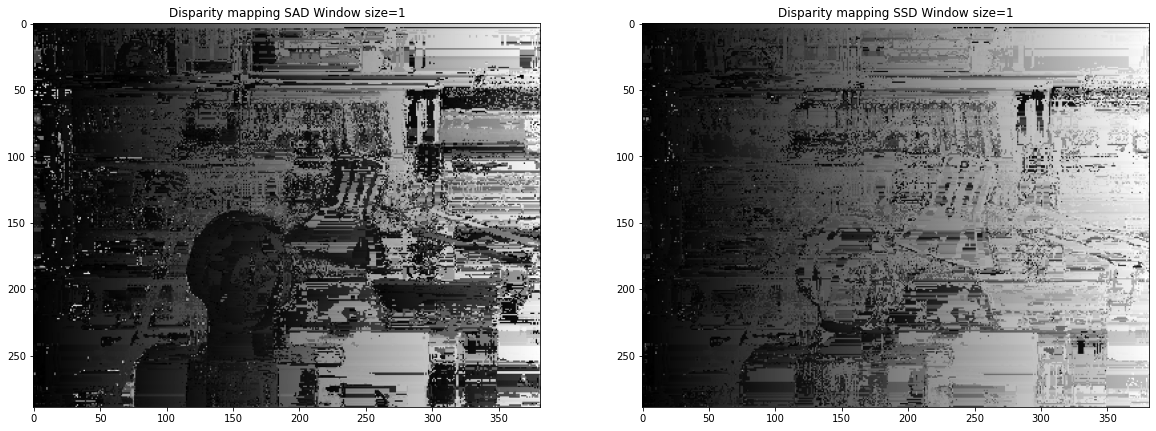

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity1_SAD =figure.add_subplot(1,2,1)
disparity1_SAD.imshow(dis1_1_SAD, cmap='gray')
disparity1_SAD.title.set_text("Disparity mapping SAD Window size=1")
disparity1_SSD =figure.add_subplot(1,2,2)
disparity1_SSD.imshow(dis_1_1_SSD, cmap='gray')
disparity1_SSD.title.set_text("Disparity mapping SSD Window size=1")


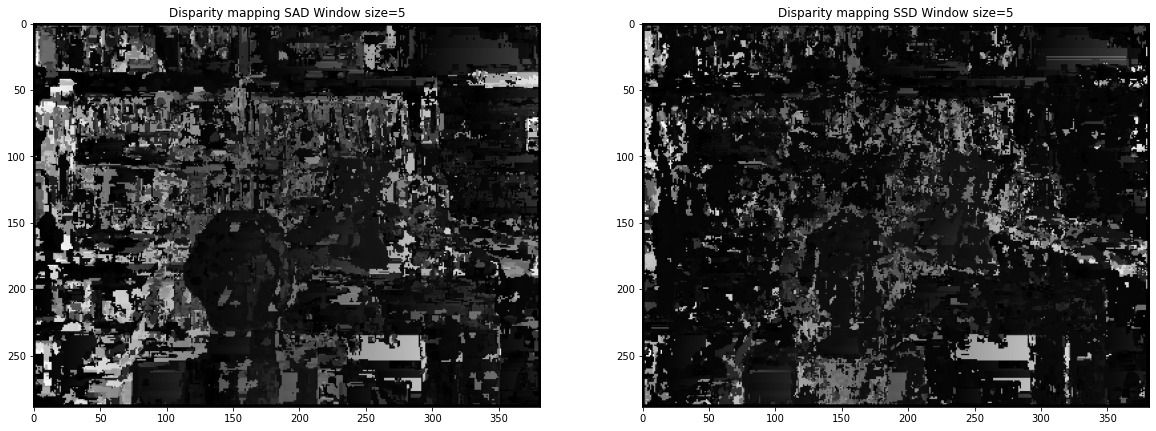

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity1_SAD5 =figure.add_subplot(1,2,1)
disparity1_SAD5.imshow(dis1_5_SAD, cmap='gray')
disparity1_SAD5.title.set_text("Disparity mapping SAD Window size=5")
disparity1_SSD5 =figure.add_subplot(1,2,2)
disparity1_SSD5.imshow(dis_1_5_SSD, cmap='gray')
disparity1_SSD5.title.set_text("Disparity mapping SSD Window size=5")


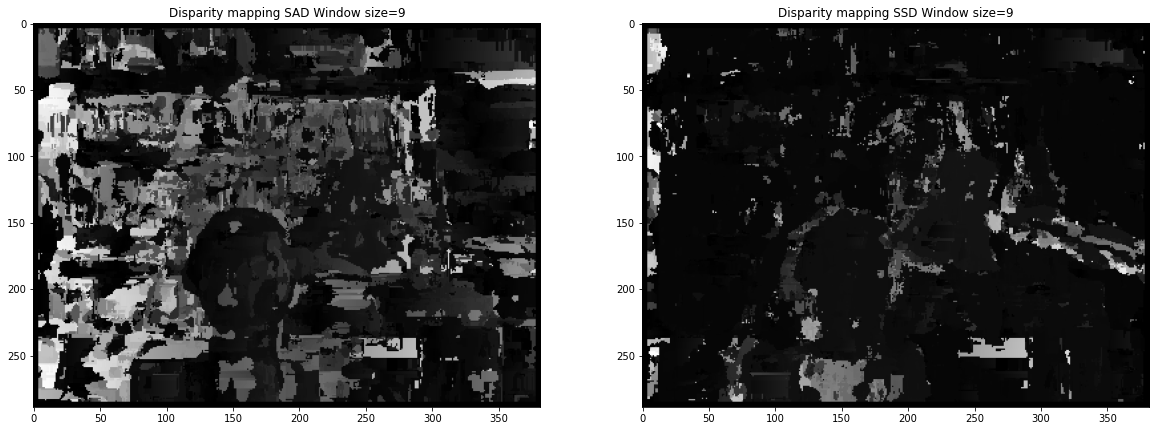

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity1_SAD9 =figure.add_subplot(1,2,1)
disparity1_SAD9.imshow(dis1_9_SAD, cmap='gray')
disparity1_SAD9.title.set_text("Disparity mapping SAD Window size=9")
disparity1_SSD9 =figure.add_subplot(1,2,2)
disparity1_SSD9.imshow(dis_1_9_SSD, cmap='gray')
disparity1_SSD9.title.set_text("Disparity mapping SSD Window size=9")


#Block Matching for image 3




In [ ]:
dis3_1_SAD,dis_3_1_SSD=blockMaching(img_l3,img_r3,1)

In [ ]:
dis3_5_SAD,dis_3_5_SSD=blockMaching(img_l3,img_r3,5)

In [ ]:
dis3_9_SAD,dis_3_9_SSD=blockMaching(img_l3,img_r3,9)

#Show Disparities mapping for image 3

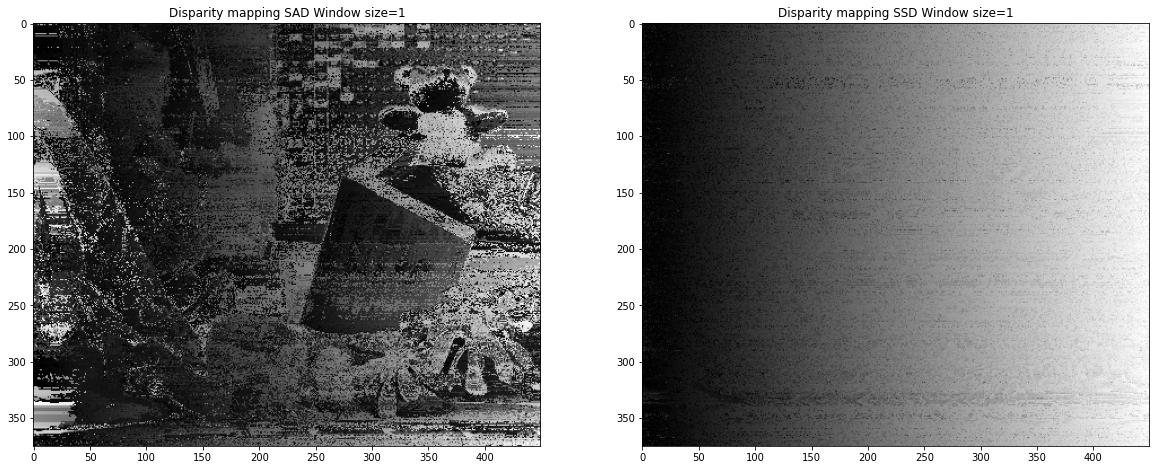

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity3_SAD =figure.add_subplot(1,2,1)
disparity3_SAD.imshow(dis3_1_SAD, cmap='gray')
disparity3_SAD.title.set_text("Disparity mapping SAD Window size=1")
disparity3_SSD =figure.add_subplot(1,2,2)
disparity3_SSD.imshow(dis_3_1_SSD, cmap='gray')
disparity3_SSD.title.set_text("Disparity mapping SSD Window size=1")


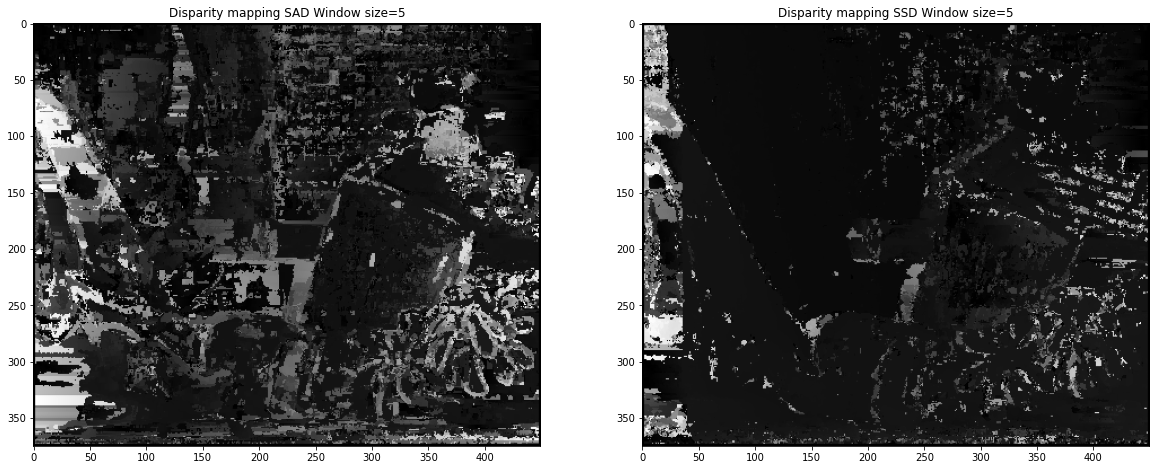

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity3_SAD5 =figure.add_subplot(1,2,1)
disparity3_SAD5.imshow(dis3_5_SAD, cmap='gray')
disparity3_SAD5.title.set_text("Disparity mapping SAD Window size=5")
disparity3_SSD5 =figure.add_subplot(1,2,2)
disparity3_SSD5.imshow(dis_3_5_SSD, cmap='gray')
disparity3_SSD5.title.set_text("Disparity mapping SSD Window size=5")


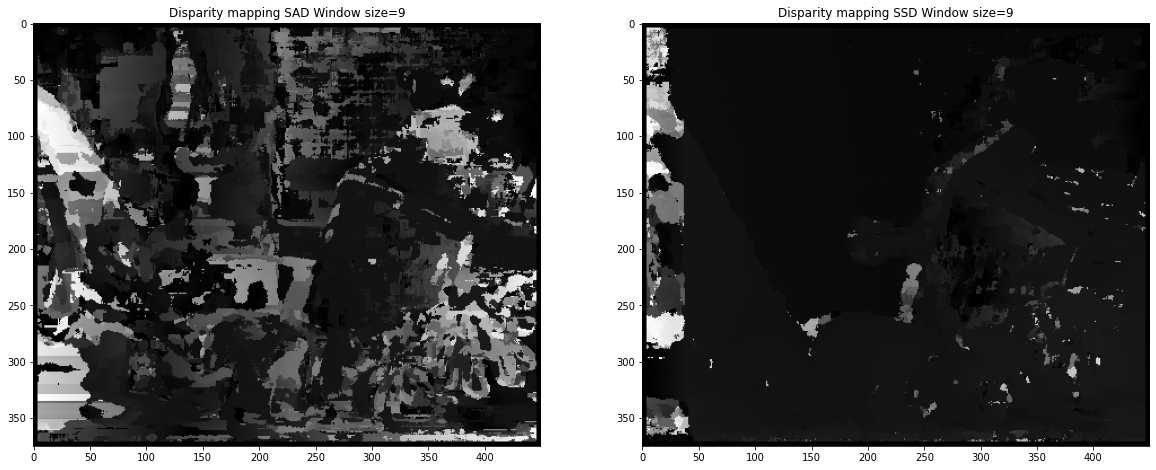

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity3_SAD9 =figure.add_subplot(1,2,1)
disparity3_SAD9.imshow(dis3_9_SAD, cmap='gray')
disparity3_SAD9.title.set_text("Disparity mapping SAD Window size=9")
disparity3_SSD9 =figure.add_subplot(1,2,2)
disparity3_SSD9.imshow(dis_3_9_SSD, cmap='gray')
disparity3_SSD9.title.set_text("Disparity mapping SSD Window size=9")


#Important Functions to DP implementation

###D_mat
to find D matrix for each row in left and right

In [ ]:
'''
def D_mat(r,l,N,sigma,c):
return D (2D_np.array) for each row in left and images

Arguments:
   r: row from right img
   l: row from left img
   N: num of elements in eash row (shape[1] of each img)
   sigma:pixel noise
   c: cost of skipping pixel

'''
def D_mat(r,l,N,sigma,c):
   D=np.zeros((N,N),dtype=int)
   for i in range(N):
      for j in range(N):
         d=((int(l[i])-int(r[j]))**2 /sigma**2)
         if i==0 or j==0:                    
           D[i][j]=d
         else:
           D[i][j]=min(D[i-1][j-1]+d,D[i-1][j]+c,D[i][j-1]+c)
   return  D

### Get Flags Array:
used to find left and right disparity

In [ ]:
''' 
def getFlages(D,N):
  return flages (1D_np.array) for each row in both right and left imgs

Arguments:
 D: 2D_np.array
 cost matrix for left and right row 
 N: int 
 
'''
'''1 -> skipping left
   -1-> skipping right
   0-> match '''

def getFlages(D,N):
  F=[]
  i=N-1
  j=N-1
  F.append(0)  
  while i>=0 and j>=0:
    #print(i,j)
  
    min_=min([D[i][j-1],D[i-1][j-1],D[i-1][j]])
    if min_==D[i-1][j-1]:
      F.append(0)           # match
      i=i-1
      j=j-1

    elif min_==D[i-1][j]:
      F.append(1)                #skipping left     
      i=i-1
    else:
      F.append(-1)                   #skipping right
      j=j-1
    
  return F

###Dis_line:
 find the displacity for each line in right and left disparities 

In [ ]:
'''
def dis_line(l,r,N,c,sigma):

Arguments:
  l: left row
  r:right row 
  N:num of itema in left and right rows
  sigma:pixel noise
  c: cost of skipping pixel

'''

def dis_line(l,r,N,c,sigma):
    disparity_left=np.zeros(N,dtype=int)
    disparity_right=np.zeros(N,dtype=int)
    D=D_mat(r,l,N,sigma,c)
    F=np.array(getFlages(D,N),dtype=int)
    i=N-1
    j=N-1
    f=0
    for element in range(F.shape[0]):
        if F[element]==0:
          dis =i-j
          disparity_left[i]=abs(dis)
          disparity_right[j]=abs(dis)
          i=i-1
          j=j-1
        elif F[element]==1:
           disparity_left[i]=0
           i=i-1
        elif F[element]==-1:
           disparity_right[j]=0
           j=j-1
    return disparity_left,disparity_right


#Dynamic Programing 

In [ ]:
'''
def DP(img_l,img_r,c,sigma):
 return disparity_left(2D_np.array),disparity_right(2D_np.array)

Arguments:
img_l: (2D_np.array) left img
img_r:(2D_np.array)  right img
sigma:pixel noise
c: cost of skipping pixel
'''
'''1 -> skipping left
   -1-> skipping right
   0-> match '''

def DP(img_l,img_r,c,sigma):
 N=img_l.shape[1]
 disparity_left=np.zeros_like(img_r,dtype=int)
 disparity_right=np.zeros_like(img_r,dtype=int)

 for r in range (img_l.shape[0]):
   disparity_left[r],disparity_right[r]=dis_line(img_l[r],img_r[r],N,c,sigma)
 return disparity_left,disparity_right


#Calling DP function for inputs:

In [ ]:
dis_left_1,dis_rigth_1=DP(img_l1,img_r1,1,2)

In [ ]:
dis_left_3,dis_rigth_3=DP(img_l3,img_r3,1,2)

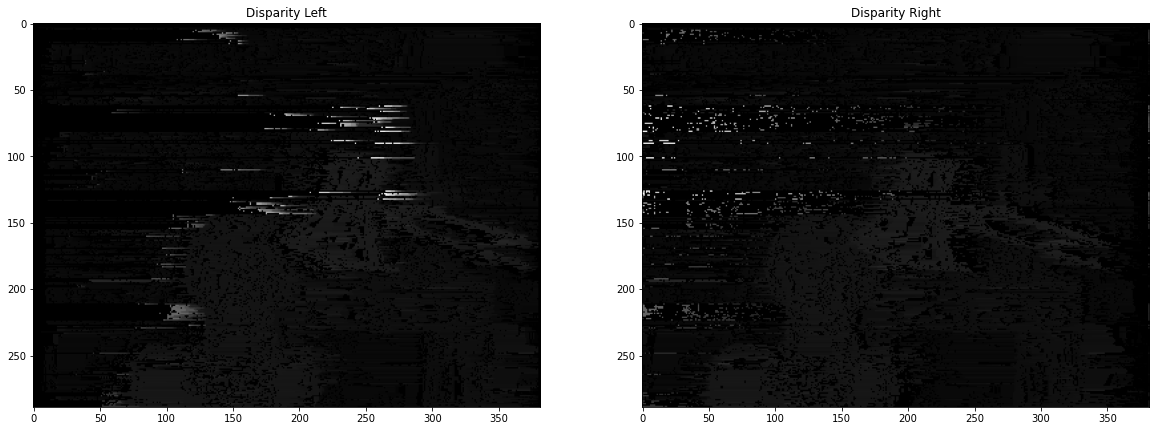

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity1_l =figure.add_subplot(1,2,1)
disparity1_l.imshow(dis_left_1, cmap='gray')
disparity1_l.title.set_text("Disparity Left")
disparity1_r =figure.add_subplot(1,2,2)
disparity1_r.imshow(dis_rigth_1, cmap='gray')
disparity1_r.title.set_text("Disparity Right")


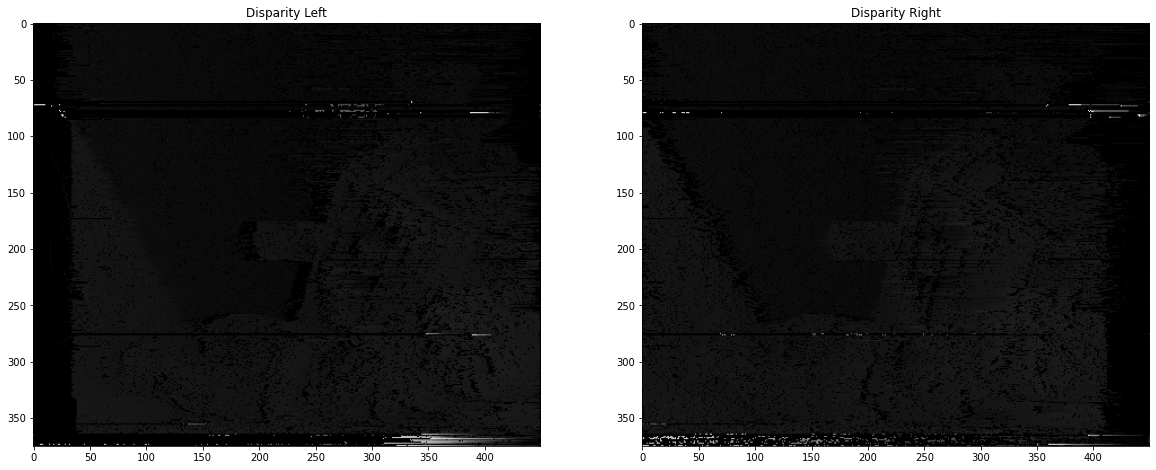

In [ ]:
figure = plt.figure(figsize=(20,8))
disparity3_l =figure.add_subplot(1,2,1)
disparity3_l.imshow(dis_left_3, cmap='gray')
disparity3_l.title.set_text("Disparity Left")
disparity3_r =figure.add_subplot(1,2,2)
disparity3_r.imshow(dis_rigth_3, cmap='gray')
disparity3_r.title.set_text("Disparity Right")


#Testing Flags matrix:

(438,)


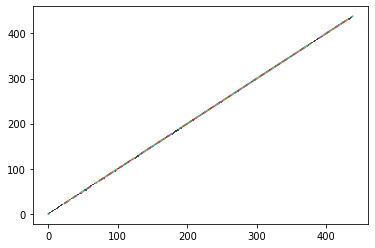

In [ ]:
D_=D_mat(img_r3[150],img_l3[150],img_l3.shape[1],2,1)
F=np.array(getFlages(D_,img_l1.shape[1]),dtype=int)
print(F.shape)
for i in range(F.shape[0]):
  if(F[i]==0):                      # if maching plot diagonal line
     x=[i,i+0.25,i+0.5,i+1]
     plt.plot(x,x)
  elif(F[i]==1):                   #if skipping left plot H line
     plt.hlines(i,i,i+1)
  else:
    plt.vlines(i,i,i+1)           #if skipping right plot V line
